
Количество пустых ячеек в исходном наборе = 866

Количество пустых ячеек в измененном наборе = 0

НАБОР ДАННЫХ С ЗАПОЛНЕННЫМИ ПУСТЫМИ ЯЧЕЙКАМИ:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,A5,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B6,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,G1,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,C6,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,F29,S



ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО ПОЛА:


Sex
female    74.203822
male      18.890815
dtype: float64

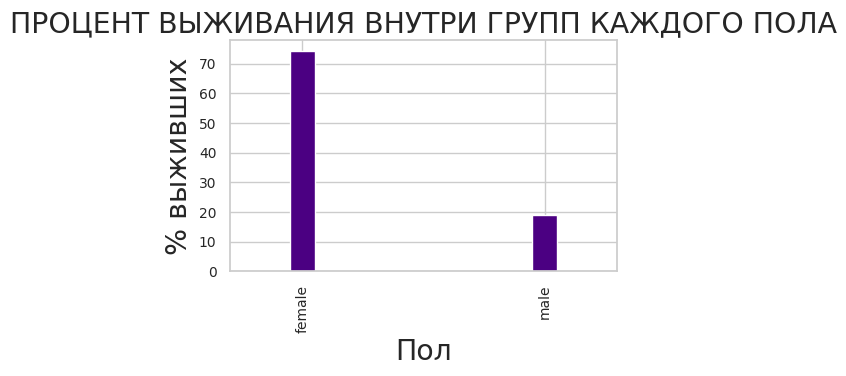


ПРОЦЕНТ ВЫЖИВАНИЯ В КАЖДОЙ ВОЗРАСТНОЙ ГРУППЕ:


Age
0     100.000000
1      71.428571
2      30.000000
3      83.333333
4      70.000000
         ...    
66      0.000000
70      0.000000
71      0.000000
74      0.000000
80    100.000000
Length: 71, dtype: float64

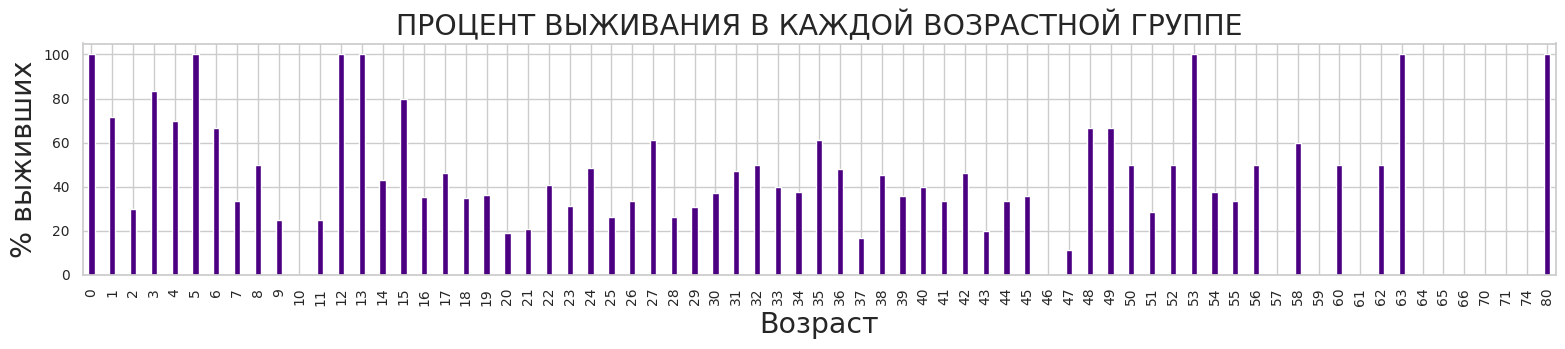


ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО КЛАССА КРУИЗА:


Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

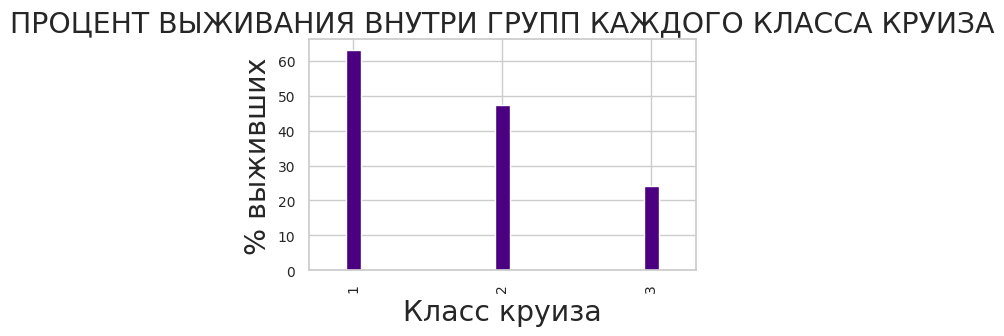


ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОЙ ПАЛУБЫ:


Deck
A    35.156250
B    42.514970
C    43.428571
D    35.294118
E    75.000000
F    30.952381
G    30.275229
T     0.000000
dtype: float64

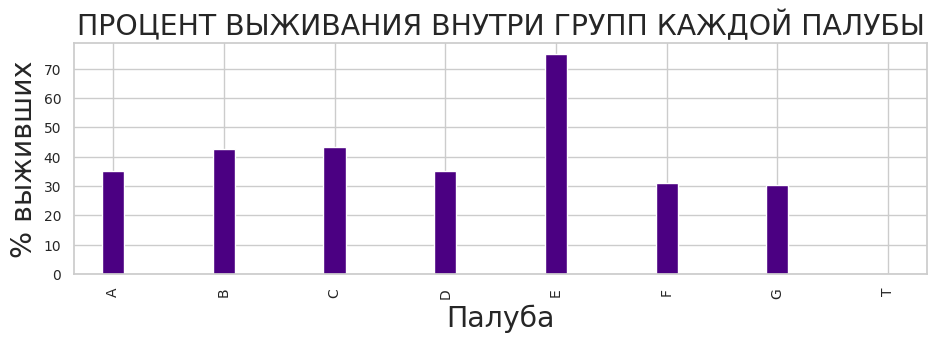

<ipython-input-78-e178dae33885>:109: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr())


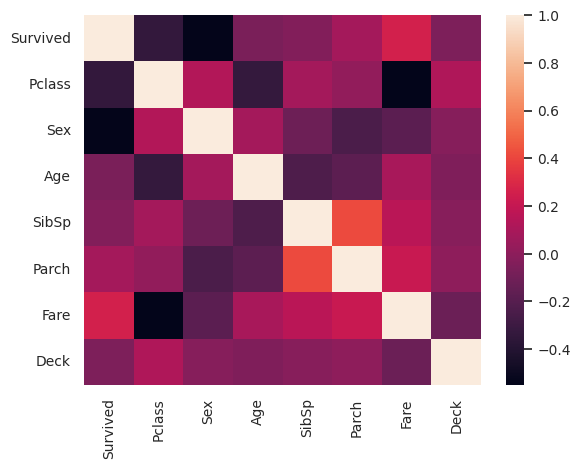

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,0
2,1,1,0,38,1,0,71.2833,2
3,1,3,0,26,0,0,7.9250,1
4,1,1,0,35,1,0,53.1000,2
5,0,3,1,35,0,0,8.0500,6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



ЗНАЧИМОСТЬ РАЗЛИЧНЫХ ПРИЗНАКОВ ДЛЯ ВЫЖИВАНИЯ, ОПРЕДЕЛЕННАЯ С ПОМОЩЬЮ МОДЕЛИ RANDOM FOREST

Точность полученной модели составляет 0.6157303370786517


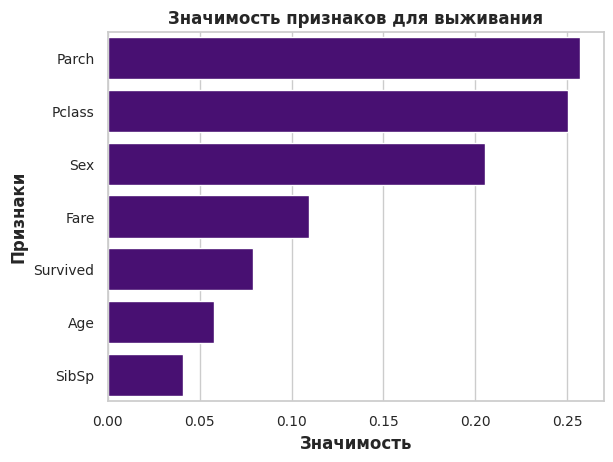

,Признаки,Gini-Importance
0,Parch,0.257005
1,Pclass,0.250347
2,Sex,0.205034
3,Fare,0.109487
4,Survived,0.079018
5,Age,0.057973
6,SibSp,0.041138


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/file/d/1NLS6-YCjx9ck-E76rERyUWqnIF-uBfC2/view?usp=sharing'
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(dataset_url)
df.set_index('PassengerId', inplace = True)
#print('ИСХОДНЫЙ НАБОР ДАННЫХ:')
#display(df)

# Посчитаем и выведем количество пустых ячеек в исходном наборе данных
count_of_null_original = df.isna().sum().sum()
print()
print(f'Количество пустых ячеек в исходном наборе = {count_of_null_original}')

# Скопируем первоначальный набор данных и будем изменять его копию
df_without_null = df.copy()

# Пустые ячейки в столбце возраста заполним средним значением, а затем переведем в целое число
df_without_null['Age'].fillna(df_without_null['Age'].mean(), inplace = True)
df_without_null['Age'] = df_without_null['Age'].apply(np.int32)

# Пустые ячейки в столбце с номером каюты заполним рандомными значениями, исходя из того, что палуб было 6: "A", "B", "C", "D", "F", "G"
# и самое маленькое количество кают было 34. То есть составим список рандомных значений номеров кают с учетом ограничения по максимальному номеру (34) для верхней палубы
cabin_class_list = ["A", "B", "C", "D", "F", "G"]
cabin_num_list = list(range(1, 35))
cabin_choise_list = [(x + str(y)) for x in cabin_class_list for y in cabin_num_list]
df_without_null['Cabin'].fillna(pd.Series(np.random.choice(cabin_choise_list, size = len(df_without_null.index) + 1)), inplace = True)

# Пустые ячейки в столбце порта посадки заполним значением из предыдущей строки
df_without_null['Embarked'].fillna(method="pad", inplace = True)

# Посчитаем и выведем количество пустых ячеек в измененном наборе данных (должно быть 0)
count_of_null_changed = df_without_null.isna().sum().sum()
print()
print(f'Количество пустых ячеек в измененном наборе = {count_of_null_changed}')

print()
print('НАБОР ДАННЫХ С ЗАПОЛНЕННЫМИ ПУСТЫМИ ЯЧЕЙКАМИ:')
display(df_without_null)

# Выведем информацию по каждому признаку: минимальное, максимальное значение (для числовых признаков) и количество уникальных значений
# df_without_null_info = df_without_null.agg(
#     {
#         "Pclass": ["min", "max", "nunique"],
#         "Name": ['nunique'],
#         "Sex": ["nunique"],
#         "Age": ["min", "max", "nunique"],
#         "SibSp": ["min", "max", "nunique"],
#         "Parch": ["min", "max", "nunique"],
#         "Ticket": ["nunique"],
#         "Fare": ["min", "max", "nunique"],
#         "Cabin": ["nunique"],
#         "Embarked": ["nunique"]
#     }
# )
# print()
# print('ИНФОРМАЦИЯ ПО ДАННЫМ:')
# display(df_without_null_info)

# Проведем аналитику: вычислим процент выживания в зависимости от различных признаков. В качестве признаков взяла пол, возраст, класс круиза, номер каюты, палубу.
# Для группировке по палубе добавила столбец, в котором выделена буква из номера каюты, обозначающая палубу

df_survived_sex = df_without_null[["Sex", "Survived"]].groupby("Sex").apply(lambda x: x['Survived'].sum() / len(x) * 100)
print()
print('ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО ПОЛА:')
display(df_survived_sex)
df_survived_sex.plot(kind='bar', title='ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО ПОЛА', ylabel='% выживших',
         xlabel='Пол', color="indigo", figsize=(5,3), width=0.1)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

df_survived_age = df_without_null[["Age", "Survived"]].groupby("Age").apply(lambda x: x['Survived'].sum() / len(x) * 100)
print()
print('ПРОЦЕНТ ВЫЖИВАНИЯ В КАЖДОЙ ВОЗРАСТНОЙ ГРУППЕ:')
display(df_survived_age)
df_survived_age.plot(kind='bar', title='ПРОЦЕНТ ВЫЖИВАНИЯ В КАЖДОЙ ВОЗРАСТНОЙ ГРУППЕ', ylabel='% выживших',
         xlabel='Возраст', color="indigo", figsize=(19,3), width=0.3)
plt.show()

df_survived_pclass = df_without_null[["Pclass", "Survived"]].groupby("Pclass").apply(lambda x: x['Survived'].sum() / len(x) * 100)
print()
print('ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО КЛАССА КРУИЗА:')
display(df_survived_pclass)
df_survived_pclass.plot(kind='bar', title='ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОГО КЛАССА КРУИЗА', ylabel='% выживших',
         xlabel='Класс круиза', color="indigo", figsize=(5,3), width=0.1)
plt.show()

df_without_null['Deck'] = df_without_null['Cabin'].apply(lambda x: x[0])
df_survived_deck = df_without_null[["Deck", "Survived"]].groupby("Deck").apply(lambda x: x['Survived'].sum() / len(x) * 100)
print()
print('ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОЙ ПАЛУБЫ:')
display(df_survived_deck)
df_survived_deck.plot(kind='bar', title='ПРОЦЕНТ ВЫЖИВАНИЯ ВНУТРИ ГРУПП КАЖДОЙ ПАЛУБЫ', ylabel='% выживших',
         xlabel='Палуба', color="indigo", figsize=(11,3), width=0.2)
plt.show()

# Посмотрим на величину корреляции между параметрами.
# Но поскольку корреляция строится только между числовыми параметрами, то Пол и Палубу переведем в число
new_df = df_without_null.copy()
new_df['Sex'] = pd.Categorical(new_df['Sex'])
new_df['Sex'] = new_df['Sex'].cat.codes
new_df['Deck'] = pd.Categorical(new_df['Deck'])
new_df['Deck'] = new_df['Deck'].cat.codes
#display(new_df)
sns.heatmap(new_df.corr())
print()
plt.show()

# Определим наиболее важные для выживания признаки методом Random Forest. Целевая переменная - Survived
# Удалим нечисловые параметры, которые рассматривать не будем
# Разделим данные на учебные и проверочные (50 на 50, но
# чтобы для Survived и в учебном, и в проверочном наборах присутствовало бы то же соотношение 0 и 1, что и в исходном наборе данных)
from sklearn.model_selection import train_test_split
RF_df = new_df.copy()
RF_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True, axis=1)
display(RF_df.head())
X = RF_df.drop('Survived', axis=1)
y = RF_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 100, stratify=y)


# Выполним масштабирование данных параметров (X)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Обучение модели RandomForest с настройками по умолчанию.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

# Выведем точность полученной модели, а также графикк значимости признаков для выживания
accuracy = rfc.score(X_train, y_train)
print()
print('ЗНАЧИМОСТЬ РАЗЛИЧНЫХ ПРИЗНАКОВ ДЛЯ ВЫЖИВАНИЯ, ОПРЕДЕЛЕННАЯ С ПОМОЩЬЮ МОДЕЛИ RANDOM FOREST')
print()
print(f'Точность полученной модели составляет {accuracy}')

rfc.feature_importances_
feats = {}
for feature, importance in list(zip(RF_df.columns, rfc.feature_importances_)):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признаки'})
fig, ax = plt.subplots()
sns.barplot(x=importances['Gini-Importance'], y=importances['Признаки'], data=importances, color='indigo')
plt.xlabel('Значимость', fontsize=12, weight = 'bold')
plt.ylabel('Признаки', fontsize=12, weight = 'bold')
plt.title('Значимость признаков для выживания', fontsize=12, weight = 'bold')
plt.show()
display(importances)

# Подведем итоги анализа
# resume = {'Признак': ['Пол',
#                       'Возраст',
#                       'Клас круиза',
#                       'Палуба'],
#           'Вывод': ['Выживаемость среди женщин значительно выше. Скорее всего, причина в том, что их сажали в шлюпки в первую очередь',
#                     'Выживаемость среди детей до 16 лет выше, чем в других возрастных группах (без учета 0 и 100, что связано с малым количеством людей в группе). Опять же их сажали в шлюпки в первую очередь',
#                     'Видна прямая зависимость: чем выше класс, тем больше процент выживания. На мой взгляд, у них был проще доступ к шлюпкам, а также, возможно, пассажирам из 1го и 2го классов оказывали приоритет по спасению',
#                     'Результат интересен тем, что самый большой процент выживаемости оказался на средней палубе (E), хотя сами шлюпки расположены были на самой верхней палубе. Там было очень много нулевых данных, которые были заполнены рандомно, это могло повлиять на результат. В целом же на высоких палубах процент выживаемости больше, чем на нижних, что понятно.']}
# df_resume = pd.DataFrame(resume)
# pd.options.display.max_colwidth = 512
# print()
# print('НЕКОТОРЫЕ ВЫВОДЫ:')
# display(df_resume)